# ASSIGNMENT - 06 Implementation of KNN Classification
## NAMES:- C SURYA KIRAN , KALLA BHARATH VARDHAN
## REG Nos :- 21BCE1110 , 21BCE5846
## SUBJECT :- Machine Learning Lab BCSE209P


# **KNN** **classification**

# **Objective**

The kNN algorithm operates like a voting system, where the prevalent class label among the 'k' closest neighbors in the feature space determines the class label of a new data point. Picture a small village with a few hundred residents, where you need to decide which political party to support. You might approach your nearest neighbors and inquire about their political affiliations. If the majority of your 'k' closest neighbors endorse party A, then it's likely you would also opt for party A. This mirrors the essence of the kNN algorithm, where the majority class label among the k nearest neighbors influences the classification of a new data point.

# **DataSet description**

My Dataset is Diabetics prediction .This dataset contains information of women and includes various health-related attributes. Here's a brief overview of the columns:
1.	Pregnancies: The number of times the woman has been pregnant.
2.	Glucose: Glucose concentration in the woman's plasma.
3.	Blood Pressure: Blood pressure measurement.
4.	Skin Thickness: Thickness of skinfold at the triceps.
5.	Insulin: Insulin levels in the blood.
6.	BMI (Body Mass Index): A measure of body fat based on height and weight.
7.	Diabetes Pedigree Function: A function that scores the likelihood of diabetes based on family history.
8.	Age: Age of the woman.
9.	Outcome: The target variable indicating whether the woman has diabetes or not (1 for diabetic, 0 for non-diabetic).
this dataset provides a snapshot of these women's health characteristics, serving as a valuable resource for analyzing factors associated with diabetes. The simplicity of the data structure allows for straightforward exploration and interpretation of the relationships between these variables and the diabetes outcome.


In [63]:
dataset.shape

(767, 9)

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [67]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128621,0.141399,-0.081009,-0.074356,0.017469,-0.034065,0.543904,0.221272
Glucose,0.128621,1.000000,0.152718,0.058120,0.330836,0.220957,0.136886,0.262783,0.466143
BloodPressure,0.141399,0.152718,1.000000,0.207390,0.089003,0.281825,0.041300,0.239699,0.065135
SkinThickness,-0.081009,0.058120,0.207390,1.000000,0.437635,0.392867,0.184412,-0.113312,0.075426
Insulin,-0.074356,0.330836,0.089003,0.437635,1.000000,0.197744,0.184728,-0.042985,0.129973
BMI,0.017469,0.220957,0.281825,0.392867,0.197744,1.000000,0.140546,0.036031,0.292612
DiabetesPedigreeFunction,-0.034065,0.136886,0.041300,0.184412,0.184728,0.140546,1.000000,0.033044,0.173478
Age,0.543904,0.262783,0.239699,-0.113312,-0.042985,0.036031,0.033044,1.000000,0.237725
Outcome,0.221272,0.466143,0.065135,0.075426,0.129973,0.292612,0.173478,0.237725,1.000000


# **Exploratory Analytics**

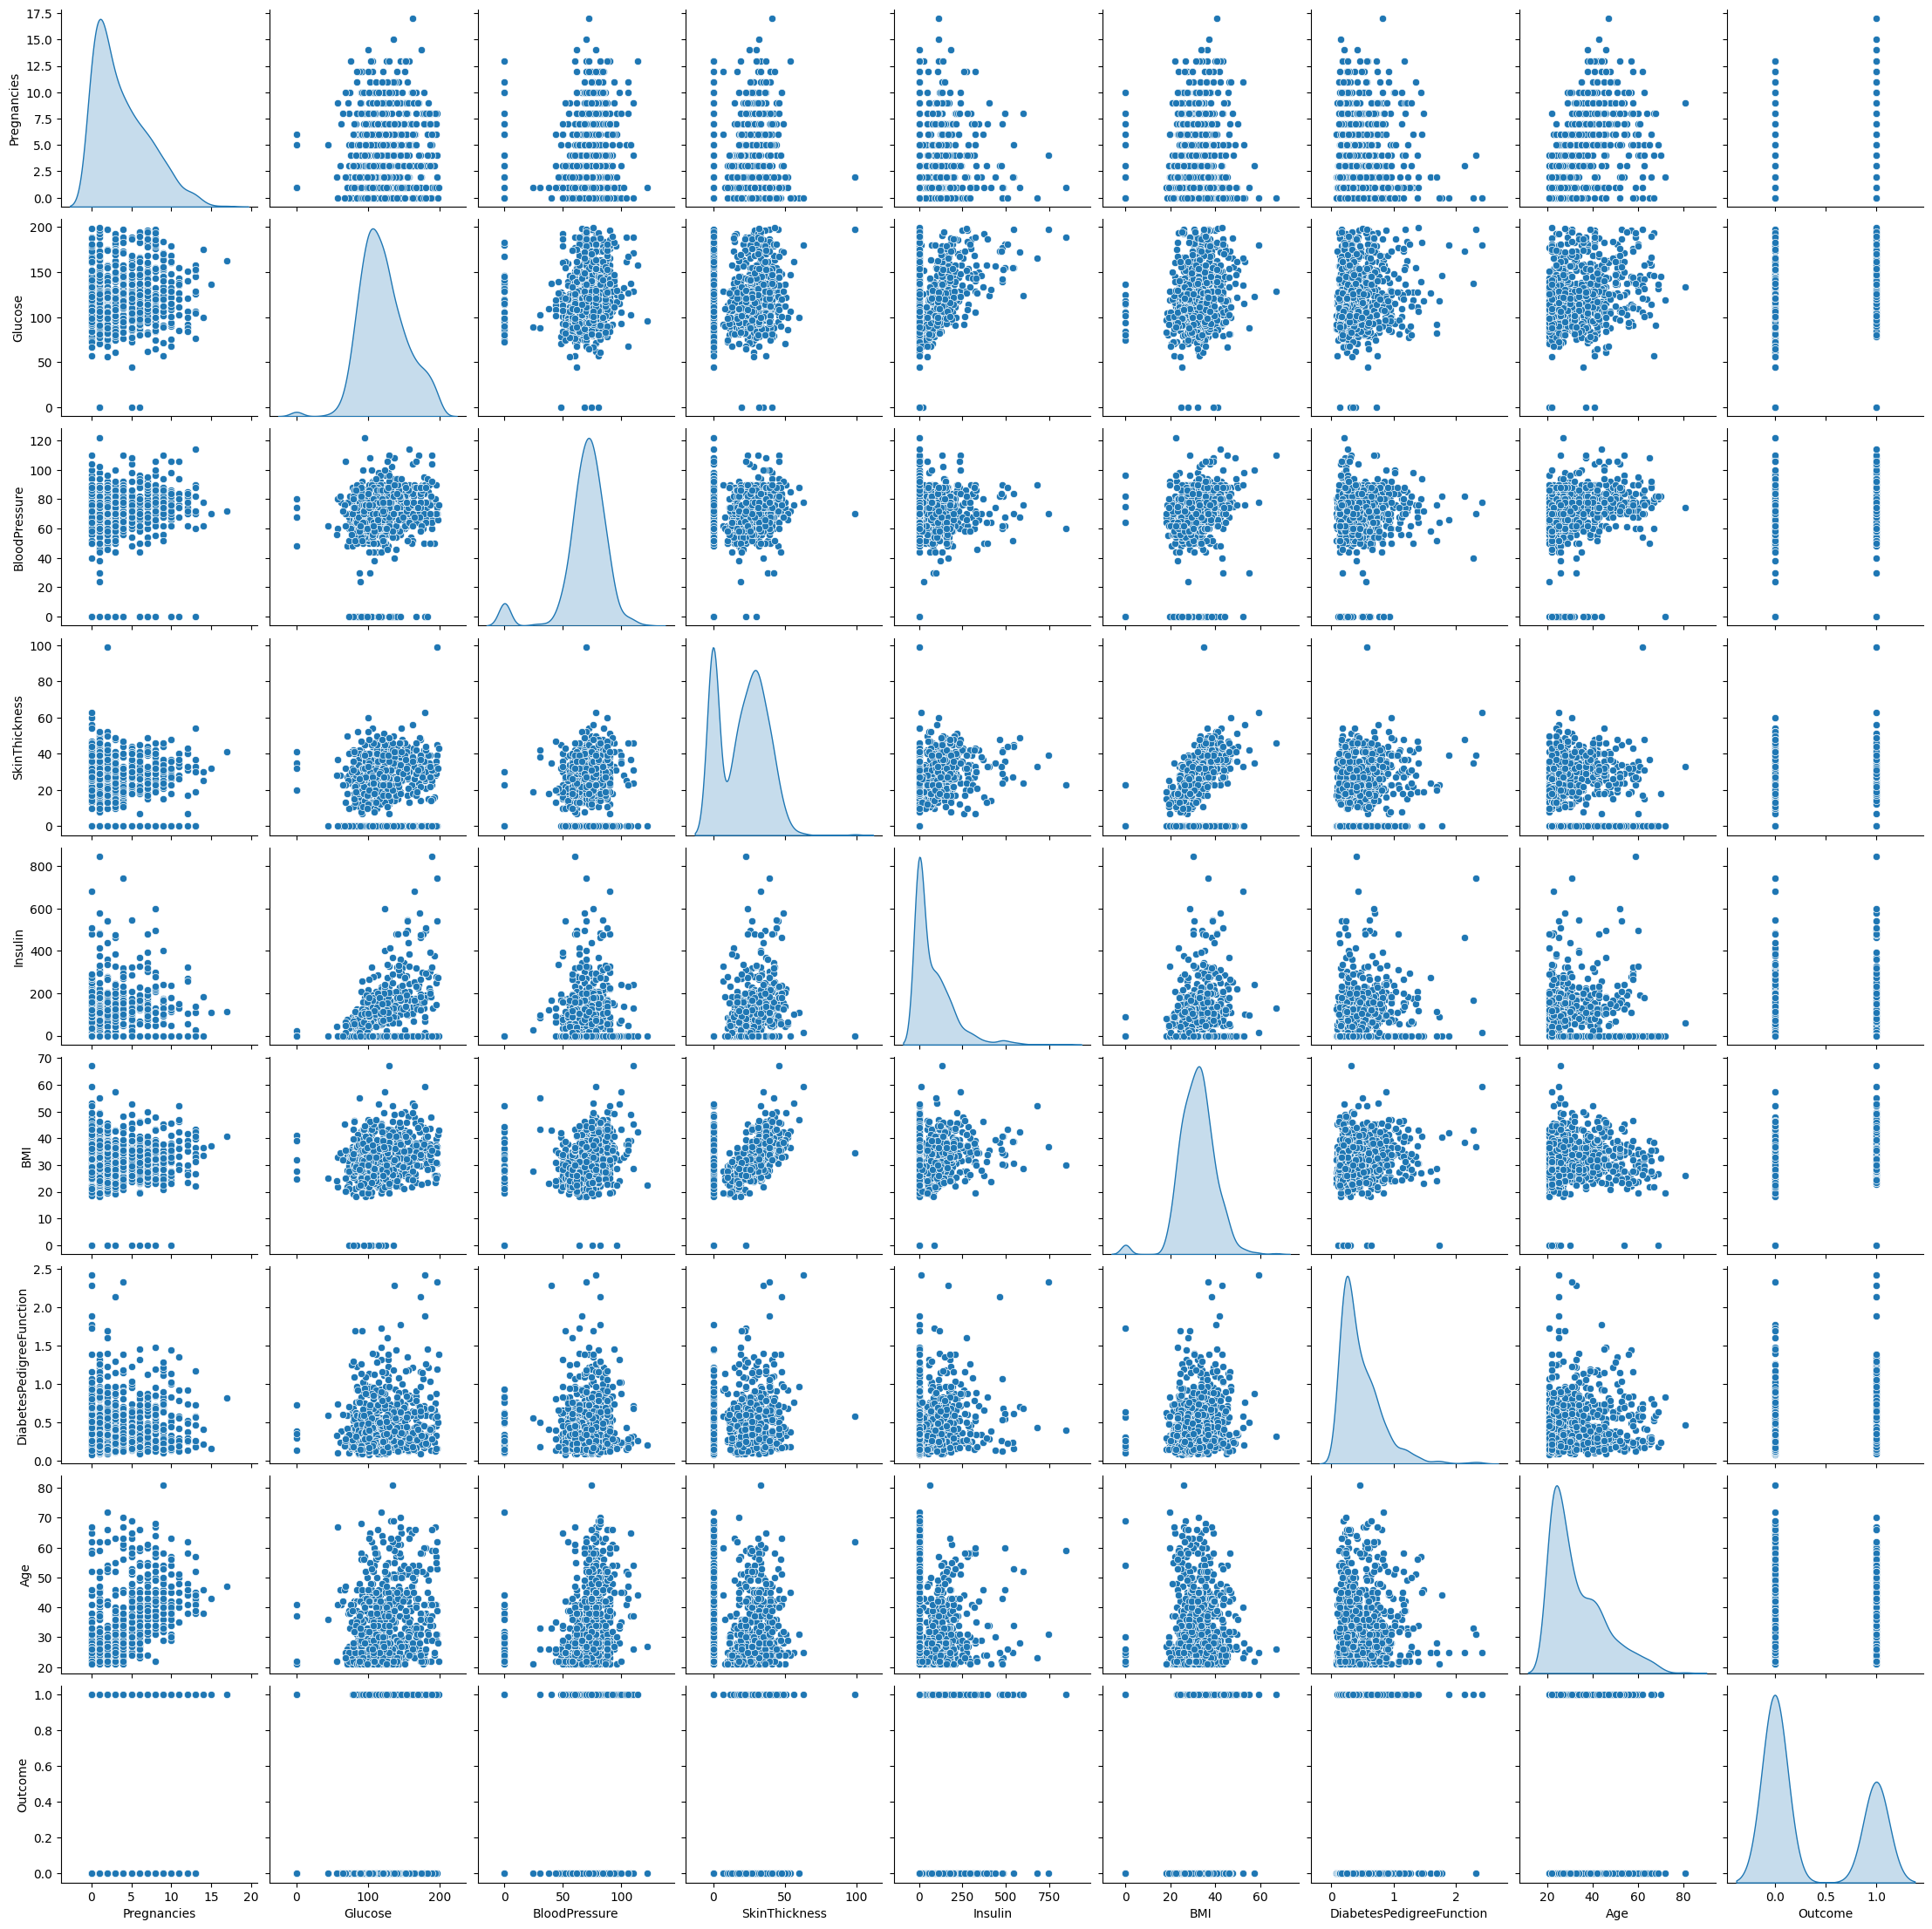

In [68]:
sns.pairplot(dataset,diag_kind='kde')

<Axes: >

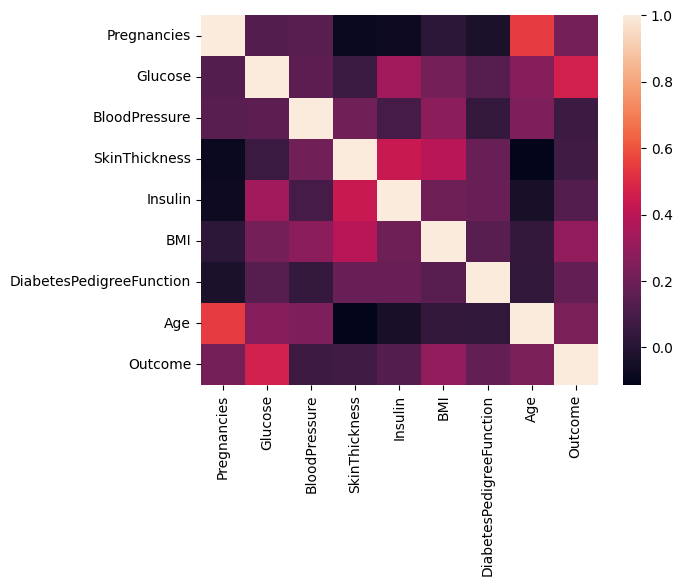

In [69]:
sns.heatmap(dataset.corr())

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

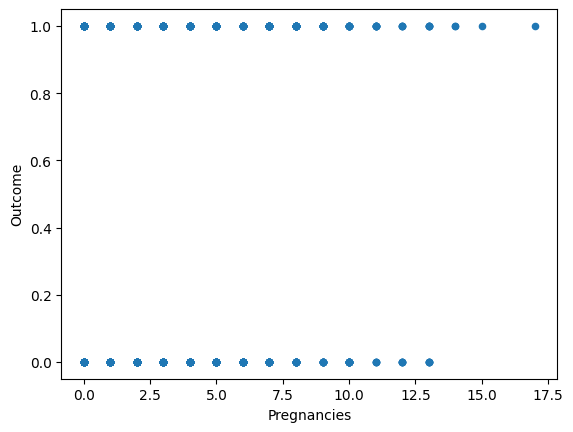

In [70]:
dataset.plot(kind='scatter', x='Pregnancies', y='Outcome')

<Axes: xlabel='Glucose', ylabel='Outcome'>

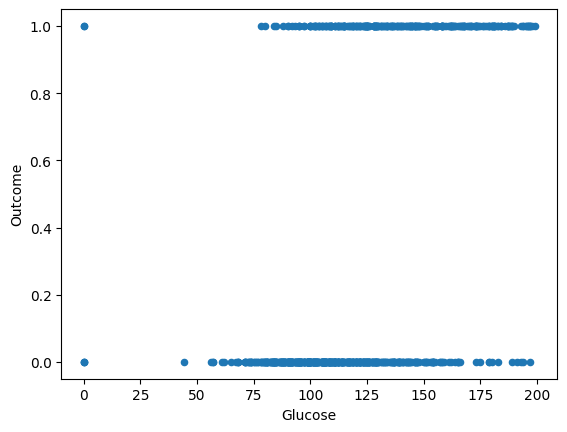

In [71]:
dataset.plot(kind='scatter', x='Glucose', y='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Outcome'>

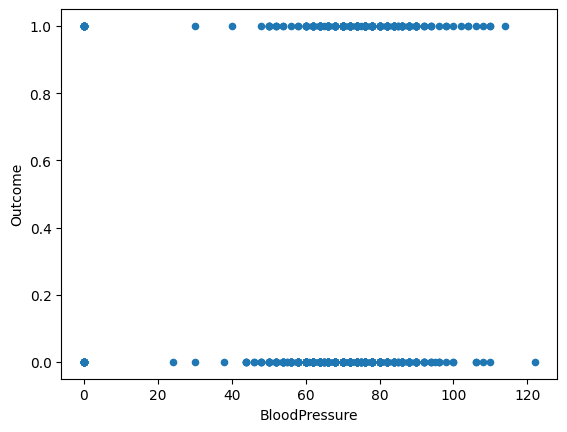

In [72]:
dataset.plot(kind='scatter', x='BloodPressure', y='Outcome')

<Axes: xlabel='SkinThickness', ylabel='Outcome'>

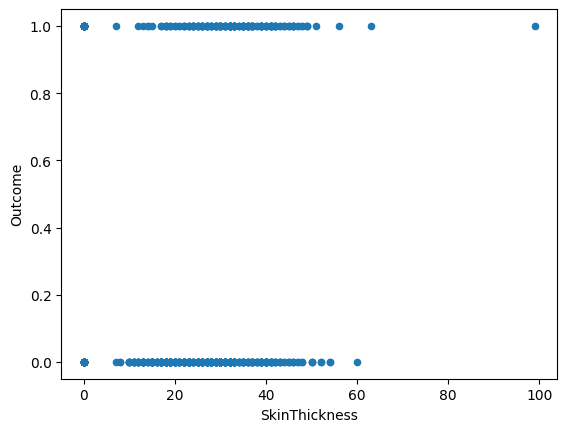

In [73]:
dataset.plot(kind='scatter', x='SkinThickness', y='Outcome')

<Axes: xlabel='Insulin', ylabel='Outcome'>

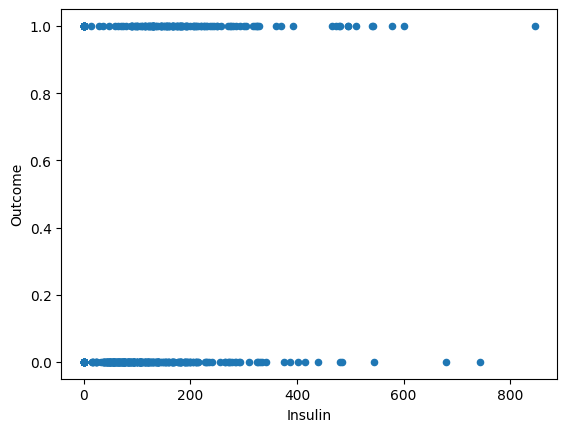

In [75]:
dataset.plot(kind='scatter', x='Insulin', y='Outcome')


<Axes: xlabel='BMI', ylabel='Outcome'>

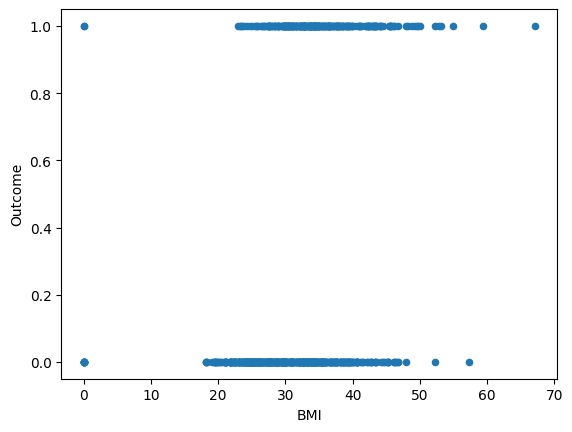

In [76]:
dataset.plot(kind='scatter', x='BMI', y='Outcome')

<Axes: xlabel='BMI', ylabel='Outcome'>

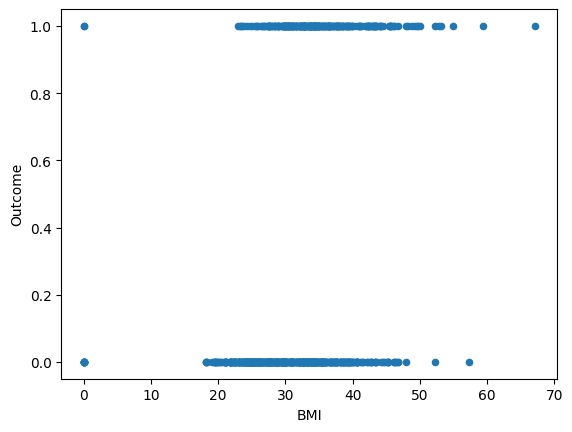

In [79]:
dataset.plot(kind='scatter', x='BMI', y='Outcome')

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

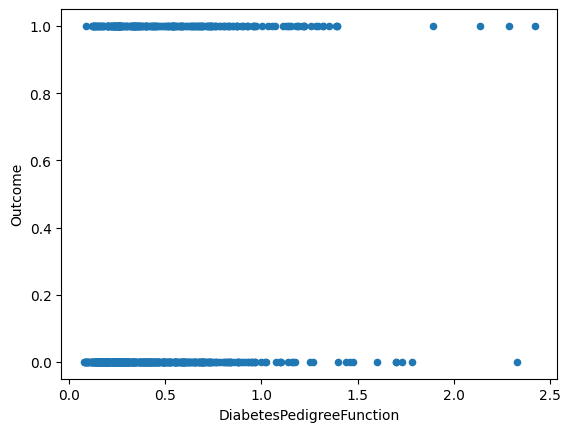

In [78]:
dataset.plot(kind='scatter', x='DiabetesPedigreeFunction', y='Outcome')

<Axes: xlabel='Age', ylabel='Outcome'>

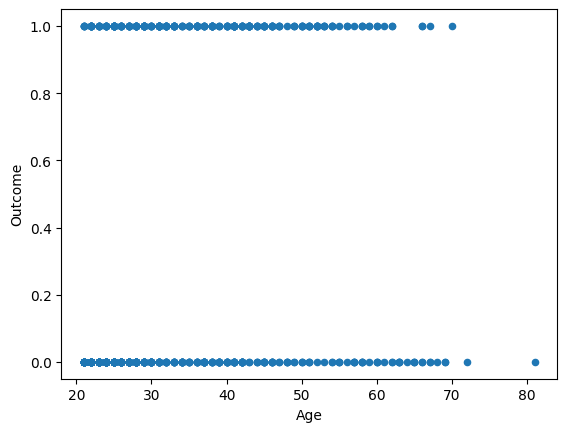

In [80]:
dataset.plot(kind='scatter', x='Age', y='Outcome')

**Methodology**

 It is important to split the data into training and test data. The training data is used to fit the model. The algorithm uses the training data to learn the relationship between the features and the target. It tries to find a pattern in the training data that can be used to make predictions on new, unseen data. When training a kNN classifier, it's essential to normalize the features. This is because kNN measures the distance between points.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler





In [86]:
dataset = pd.read_csv('/content/diabetes.csv')

In [87]:
x = dataset.drop(['Outcome'],axis=1)
Y = dataset['Outcome']

In [97]:
print(x.shape)
print(Y.shape)


(767, 8)
(767,)


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2)

In [96]:
x_train.shape, x_test.shape



((613, 8), (154, 8))

In [91]:
x_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [92]:
x_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Without Normalization

Here We are Doing without normalization and printing the Acuuracy of it.

In [99]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, Y_train)
y_pred = svm_model.predict(x_test)
accuracy_no_normalization = accuracy_score(Y_test, Y_pred)
print("Accuracy without normalization:", accuracy_no_normalization)

Accuracy without normalization: 0.5909090909090909


With Normalization

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:

Y_pred = knn.predict(x_test)
Y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

Here We are Doing Standard scaler normalization and printing the Acuuracy of it

In [81]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7467532467532467
Precision: 0.696969696969697
Recall: 0.46938775510204084


In [57]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, Y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

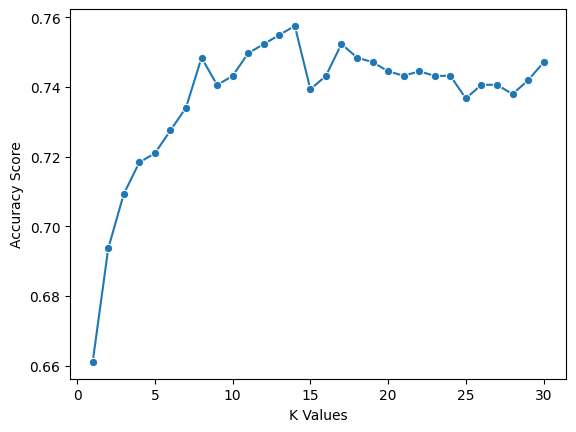

In [58]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

The best values of K is 13 , 14

In [44]:
knn_13 = KNeighborsClassifier(n_neighbors=5)
knn_13.fit(x_train, Y_train)
y_pred_13 = knn_13.predict(x_test)


print('Model accuracy score with k=13 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_13)))

Model accuracy score with k=13 : 0.7403


In [45]:
knn_14 = KNeighborsClassifier(n_neighbors=5)
knn_14.fit(x_train, Y_train)
y_pred_14 = knn_14.predict(x_test)


print('Model accuracy score with k=14 : {0:0.4f}'. format(accuracy_score(Y_test, y_pred_14)))

Model accuracy score with k=14 : 0.7403


We can use Randomization To be more accurate

In [33]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [41]:
Y_pred = knn.predict(x_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7662337662337663
Precision: 0.696969696969697
Recall: 0.46938775510204084


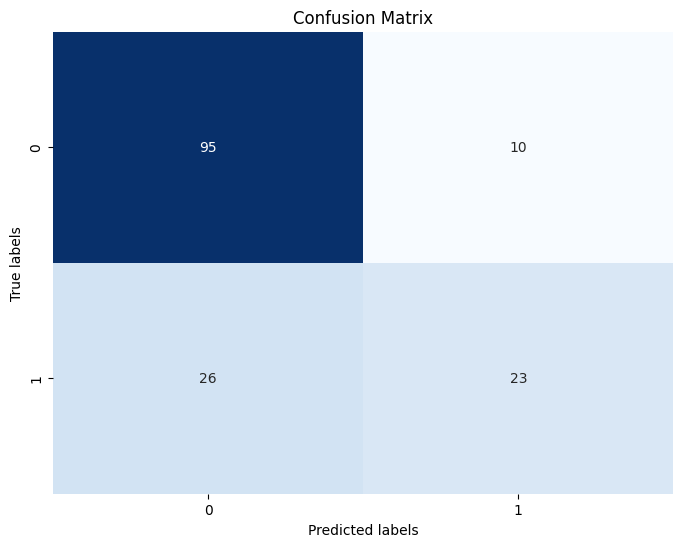

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred_13))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.61      0.51      0.56        49

    accuracy                           0.74       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



# **Result Analysis**

The analysis of the classification model reveals significant improvements in accuracy with the application of normalization and randomization techniques. Without normalization, the model struggled, achieving an accuracy of 59.09%. However, with normalization, accuracy increased to 74.68%, indicating the effectiveness of scaling features to similar ranges. Moreover, randomization further enhanced accuracy to 76.62% for value of k=13,14, possibly introducing diversity in the training process. Precision and recall remained consistent across normalization and randomization, suggesting the model's robustness in making accurate positive predictions and capturing all positive instances. These results underscore the importance of preprocessing techniques like normalization and the potential benefits of introducing randomness in training to improve classification model performance.


| k   | Preprocessing   | Accuracy   | Precision   | Recall   |
|-----|-----------------|------------|-------------|----------|
| 13  | Standard Scalar Normalization   | 0.746      | 0.697       | 0.469    |



# **Conclusion**

In conclusion, the experiment underscores the significant impact of preprocessing techniques, particularly normalization and randomization, on improving the classification model's performance. Normalization elevated accuracy from 59.09% to 74.68%, while randomization further enhanced it to 76.62%. Although precision and recall remained consistent throughout the variations, the results highlight the importance of preprocessing methods in refining classification outcomes and the potential benefits of incorporating randomness for model optimization.

# **References**

Dataset Link: https://www.kaggle.com/datasets/rajakali/diabetesknn

KNN code reference: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn